In [1]:
import os
import torch
import matplotlib.pyplot as plt
import pickle
from data_loader.data_loader import TrainDataProvider
from model.models import Encoder, Generator, Discriminator, Decoder
from utils.util import *

/opt/homebrew/Caskroom/miniconda/base/envs/openmmlab/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
En = Encoder()
De = Decoder()
D = Discriminator(category_num=25)
from_model_path = './checkpoint/'
encoder_path = '45-Encoder.pkl'
decoder_path = '45-Decoder.pkl'
discriminator_path = '45-Discriminator.pkl'

En.load_state_dict(torch.load(os.path.join(from_model_path, encoder_path), map_location='cpu'))
De.load_state_dict(torch.load(os.path.join(from_model_path, decoder_path), map_location='cpu'))
D.load_state_dict(torch.load(os.path.join(from_model_path, discriminator_path), map_location='cpu'))

<All keys matched successfully>

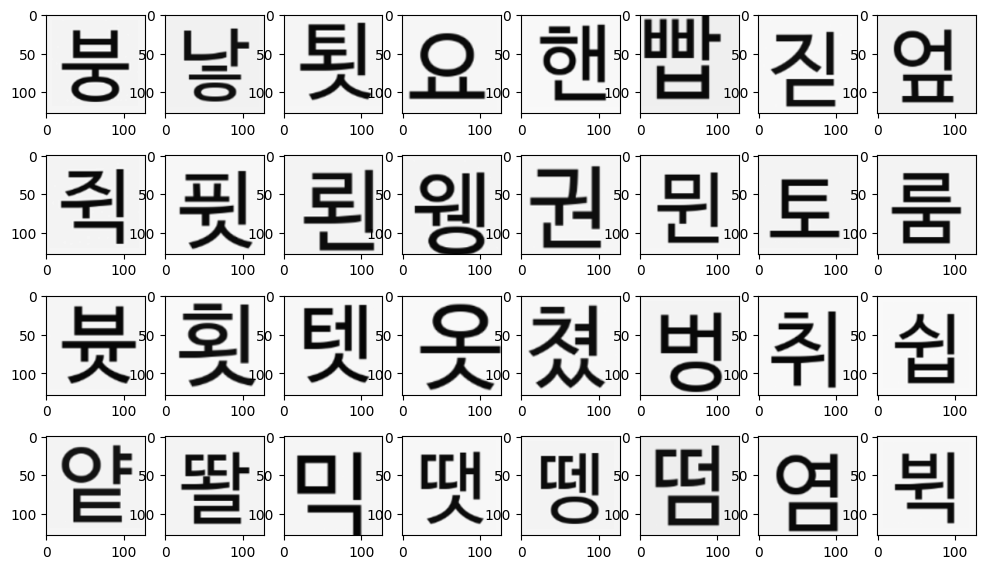

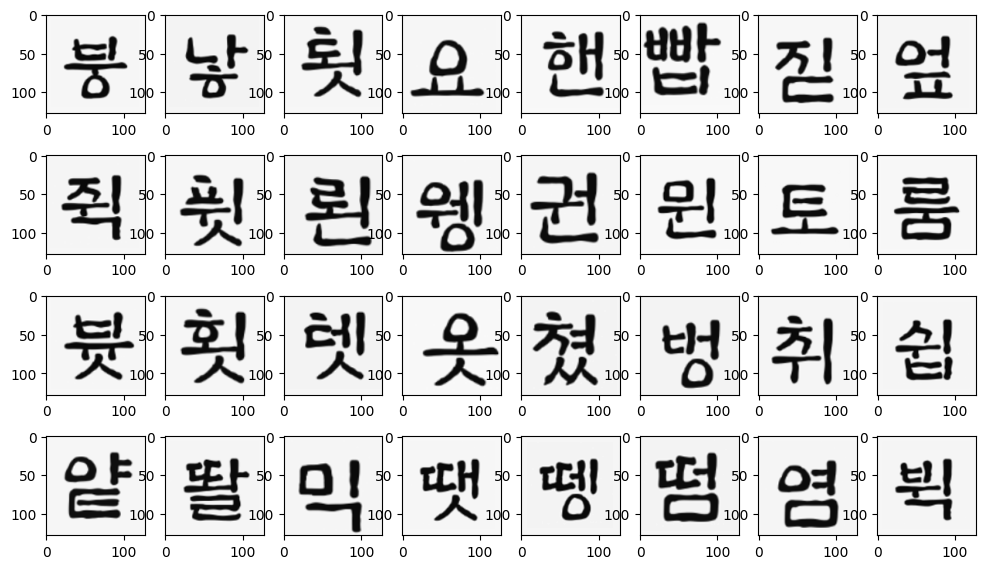

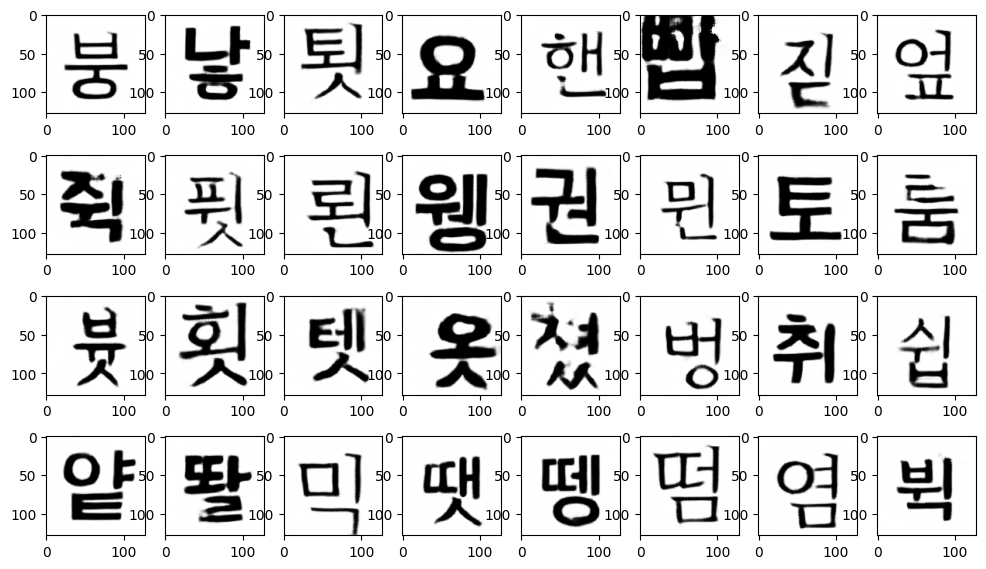

In [24]:
fixed_dir = "./data/"
embeddings = torch.load(os.path.join(fixed_dir, "EMBEDDINGS.pkl"), map_location='cpu')
fixed_label = torch.load(os.path.join(fixed_dir, 'fixed_label_16.pkl'), map_location='cpu')

fixed_source_1 = torch.load(os.path.join(fixed_dir, 'fixed_source_16.pkl'), map_location='cpu')
fixed_fake_images_1 = Generator(fixed_source_1, En, De, embeddings, fixed_label)[0]
fixed_target_1 = torch.load(os.path.join(fixed_dir, 'fixed_target_16.pkl'), map_location='cpu')

plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_source_1):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_target_1):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
plt.show()

plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_fake_images_1):
    plt.subplot(4, 8, idx+1)
    plt.imshow(image.detach().numpy().reshape(128, 128), cmap='gray')
plt.show()